# Microsoft Film Insights

### Importing Packages and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from glob import glob

csv_files = glob("zippedData/*.csv.gz")

import os

In [3]:
cd dsc-phase-1-project/

C:\Users\Nick\dsc-phase-1-project


In [4]:
csv_files

[]

In [5]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

### Investigating Our Data

In [6]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Need to convert our monetary values to numbers so they are easier to work with.

In [7]:
movie_budgets_df[movie_budgets_df.columns[3:]] = movie_budgets_df[movie_budgets_df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [8]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [9]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
title_ratings_df = title_ratings_df.drop(columns=['numvotes'])

In [11]:
title_basics_df.isna().sum() / len(title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [12]:
title_ratings_df.isna().sum() / len(title_ratings_df)

tconst           0.0
averagerating    0.0
dtype: float64

In [13]:
movie_gross_df.isna().sum() / len(movie_gross_df)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [14]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
title_basics_dfprimary = title_basics_df.set_index('primary_title')

In [16]:
df = movie_gross_df.join(title_basics_dfprimary, on = 'title', how = 'left')

#### Combining our dataframes in order to analyze our data further.

In [17]:
df.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"


In [18]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [19]:
movie_budgets_df['year'] = pd.to_datetime(movie_budgets_df['release_date']).dt.year
movie_budgets_df['month'] = pd.to_datetime(movie_budgets_df['release_date']).dt.month

#### Setting our 'release_data' column to two separate columns as numerical values (one for year, one for month) in order to combine with another dataframe and to examine them for a possible seasonality correlation later on.

In [20]:
movie_budgets_df = movie_budgets_df.drop(columns=['domestic_gross', 'worldwide_gross'])

#### Dropping redundant columns.

In [21]:
movie_budgets_df = movie_budgets_df.drop('release_date', axis=1)

In [22]:
movie_details_df = pd.merge(movie_budgets_df, df, left_on = ['movie', 'year'],
                           right_on = ['title', 'start_year'],
                           how = 'inner')

#### Combining our Dataframe with another 'Movie_Budgets' Dataframe in order to build our set of data further.

In [23]:
movie_details_df.head()

,id,movie,production_budget,year_x,month,title,studio,domestic_gross,foreign_gross,year_y,tconst,original_title,start_year,runtime_minutes,genres
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,2011,5,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
1,4,Avengers: Age of Ultron,330600000.0,2015,5,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
2,7,Avengers: Infinity War,300000000.0,2018,4,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
3,9,Justice League,300000000.0,2017,11,Justice League,WB,229000000.0,428900000,2017,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
4,10,Spectre,300000000.0,2015,11,Spectre,Sony,200100000.0,680600000,2015,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


In [24]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1068 non-null   int64  
 1   movie              1068 non-null   object 
 2   production_budget  1068 non-null   float64
 3   year_x             1068 non-null   int64  
 4   month              1068 non-null   int64  
 5   title              1068 non-null   object 
 6   studio             1068 non-null   object 
 7   domestic_gross     1067 non-null   float64
 8   foreign_gross      956 non-null    object 
 9   year_y             1068 non-null   int64  
 10  tconst             1068 non-null   object 
 11  original_title     1068 non-null   object 
 12  start_year         1068 non-null   float64
 13  runtime_minutes    1060 non-null   float64
 14  genres             1065 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 133.5+ KB


In [25]:
movie_details_df["foreign_gross"] = pd.to_numeric(movie_details_df.foreign_gross, errors='coerce')

#### Converting 'foreign_gross' column to float value so we can combine it with the already float value column in 'domestic_gross'.

In [26]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1068 non-null   int64  
 1   movie              1068 non-null   object 
 2   production_budget  1068 non-null   float64
 3   year_x             1068 non-null   int64  
 4   month              1068 non-null   int64  
 5   title              1068 non-null   object 
 6   studio             1068 non-null   object 
 7   domestic_gross     1067 non-null   float64
 8   foreign_gross      952 non-null    float64
 9   year_y             1068 non-null   int64  
 10  tconst             1068 non-null   object 
 11  original_title     1068 non-null   object 
 12  start_year         1068 non-null   float64
 13  runtime_minutes    1060 non-null   float64
 14  genres             1065 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 133.5+ KB


In [27]:
movie_details_df = movie_details_df.drop_duplicates(subset=['year_x', 'title'])

#### Removing any duplicates we may have in our dataset.

In [28]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1040 non-null   int64  
 1   movie              1040 non-null   object 
 2   production_budget  1040 non-null   float64
 3   year_x             1040 non-null   int64  
 4   month              1040 non-null   int64  
 5   title              1040 non-null   object 
 6   studio             1040 non-null   object 
 7   domestic_gross     1039 non-null   float64
 8   foreign_gross      930 non-null    float64
 9   year_y             1040 non-null   int64  
 10  tconst             1040 non-null   object 
 11  original_title     1040 non-null   object 
 12  start_year         1040 non-null   float64
 13  runtime_minutes    1038 non-null   float64
 14  genres             1040 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 130.0+ KB


In [29]:
movie_details_df['world_gross'] = (movie_details_df['domestic_gross'] + movie_details_df['foreign_gross'])

#### Creating new 'world_gross' column in order to look at the total revenue generated from each movie.

In [30]:
movie_details_df['ROI'] = (movie_details_df['world_gross'] / movie_details_df['production_budget']) * 100

#### Creating 'ROI' column to look at the 'Return on Investment', in order to look at how profitable movies are on a percentage basis.

In [31]:
movie_details_df.sort_values(by=['ROI'], ascending=False)

,id,movie,production_budget,year_x,month,title,studio,domestic_gross,foreign_gross,year_y,tconst,original_title,start_year,runtime_minutes,genres,world_gross,ROI
1065,80,The Gallows,100000.0,2015,7,The Gallows,WB (NL),22800000.0,20200000.0,2015,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",43000000.0,43000.0
1045,12,The Devil Inside,1000000.0,2012,1,The Devil Inside,Par.,53300000.0,48500000.0,2012,tt1560985,The Devil Inside,2012.0,83.0,Horror,101800000.0,10180.0
999,65,Paranormal Activity 2,3000000.0,2010,10,Paranormal Activity 2,Par.,84800000.0,92800000.0,2010,tt1536044,Paranormal Activity 2,2010.0,91.0,Horror,177600000.0,5920.0
938,49,Get Out,5000000.0,2017,2,Get Out,Uni.,176000000.0,79400000.0,2017,tt5052448,Get Out,2017.0,104.0,"Horror,Mystery,Thriller",255400000.0,5108.0
939,51,Paranormal Activity 3,5000000.0,2011,10,Paranormal Activity 3,Par.,104000000.0,103000000.0,2011,tt1778304,Paranormal Activity 3,2011.0,83.0,"Horror,Mystery,Thriller",207000000.0,4140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,77,Safety Not Guaranteed,750000.0,2012,6,Safety Not Guaranteed,FD,4000000.0,NaN,2012,tt1862079,Safety Not Guaranteed,2012.0,86.0,"Comedy,Drama,Romance",NaN,NaN
1061,68,Compliance,270000.0,2012,8,Compliance,Magn.,319000.0,NaN,2012,tt1971352,Compliance,2012.0,90.0,"Biography,Crime,Drama",NaN,NaN
1063,84,The Canyons,250000.0,2013,8,The Canyons,IFC,56800.0,NaN,2013,tt2292959,The Canyons,2013.0,99.0,"Drama,Thriller",NaN,NaN
1066,86,A Ghost Story,100000.0,2017,7,A Ghost Story,A24,1600000.0,NaN,2017,tt6265828,A Ghost Story,2017.0,92.0,"Drama,Fantasy,Romance",NaN,NaN


#### Sorting the data by 'ROI' to see if I notice any patterns that jump out straight away.

In [32]:
movie_details_df['ROI'] = movie_details_df['ROI'].round()

In [33]:
movie_details_df.head()

,id,movie,production_budget,year_x,month,title,studio,domestic_gross,foreign_gross,year_y,tconst,original_title,start_year,runtime_minutes,genres,world_gross,ROI
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,2011,5,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.045700e+09,255.0
1,4,Avengers: Age of Ultron,330600000.0,2015,5,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",1.405400e+09,425.0
2,7,Avengers: Infinity War,300000000.0,2018,4,Avengers: Infinity War,BV,678800000.0,NaN,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",NaN,NaN
3,9,Justice League,300000000.0,2017,11,Justice League,WB,229000000.0,428900000.0,2017,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",6.579000e+08,219.0
4,10,Spectre,300000000.0,2015,11,Spectre,Sony,200100000.0,680600000.0,2015,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller",8.807000e+08,294.0


In [34]:
movie_details_df['production_budget'] = movie_details_df['production_budget'] / 1000000

#### Scaling down our 'production_budget' variable in order to be able to more easily  work with the data when graphing/plotting.

In [35]:
movie_details_df['genres_split'] = movie_details_df['genres'].map(lambda x: x.split(",") if x else x)

In [36]:
all_genres = set()
for genre in movie_details_df['genres_split']:
    if genre:
        all_genres.update(genre)

#### Splitting our genres up in order to use them as categorical data when viewing possible correlations.

In [37]:
y = 'Na'

In [38]:
movie_details_df['genre2'] = movie_details_df['genres_split'].map(lambda x: y if len(x) < 2 else x[1])

In [39]:
movie_details_df['genre1'] = movie_details_df['genres_split'].map(lambda x: x[0])

####  Creating new columns to send our top genres to.

In [40]:
movie_details_df.head()

,id,movie,production_budget,year_x,month,title,studio,domestic_gross,foreign_gross,year_y,tconst,original_title,start_year,runtime_minutes,genres,world_gross,ROI,genres_split,genre2,genre1
0,2,Pirates of the Caribbean: On Stranger Tides,410.6,2011,5,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.045700e+09,255.0,"[Action, Adventure, Fantasy]",Adventure,Action
1,4,Avengers: Age of Ultron,330.6,2015,5,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",1.405400e+09,425.0,"[Action, Adventure, Sci-Fi]",Adventure,Action
2,7,Avengers: Infinity War,300.0,2018,4,Avengers: Infinity War,BV,678800000.0,NaN,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",NaN,NaN,"[Action, Adventure, Sci-Fi]",Adventure,Action
3,9,Justice League,300.0,2017,11,Justice League,WB,229000000.0,428900000.0,2017,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",6.579000e+08,219.0,"[Action, Adventure, Fantasy]",Adventure,Action
4,10,Spectre,300.0,2015,11,Spectre,Sony,200100000.0,680600000.0,2015,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller",8.807000e+08,294.0,"[Action, Adventure, Thriller]",Adventure,Action


In [41]:
movie_details_df.drop(columns=['year_y'])

,id,movie,production_budget,year_x,month,title,studio,domestic_gross,foreign_gross,tconst,original_title,start_year,runtime_minutes,genres,world_gross,ROI,genres_split,genre2,genre1
0,2,Pirates of the Caribbean: On Stranger Tides,410.600,2011,5,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1.045700e+09,255.0,"[Action, Adventure, Fantasy]",Adventure,Action
1,4,Avengers: Age of Ultron,330.600,2015,5,Avengers: Age of Ultron,BV,459000000.0,946400000.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",1.405400e+09,425.0,"[Action, Adventure, Sci-Fi]",Adventure,Action
2,7,Avengers: Infinity War,300.000,2018,4,Avengers: Infinity War,BV,678800000.0,NaN,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",NaN,NaN,"[Action, Adventure, Sci-Fi]",Adventure,Action
3,9,Justice League,300.000,2017,11,Justice League,WB,229000000.0,428900000.0,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",6.579000e+08,219.0,"[Action, Adventure, Fantasy]",Adventure,Action
4,10,Spectre,300.000,2015,11,Spectre,Sony,200100000.0,680600000.0,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller",8.807000e+08,294.0,"[Action, Adventure, Thriller]",Adventure,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,84,The Canyons,0.250,2013,8,The Canyons,IFC,56800.0,NaN,tt2292959,The Canyons,2013.0,99.0,"Drama,Thriller",NaN,NaN,"[Drama, Thriller]",Thriller,Drama
1064,48,Another Earth,0.175,2011,7,Another Earth,FoxS,1300000.0,456000.0,tt1549572,Another Earth,2011.0,92.0,"Drama,Romance,Sci-Fi",1.756000e+06,1003.0,"[Drama, Romance, Sci-Fi]",Romance,Drama
1065,80,The Gallows,0.100,2015,7,The Gallows,WB (NL),22800000.0,20200000.0,tt2309260,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",4.300000e+07,43000.0,"[Horror, Mystery, Thriller]",Mystery,Horror
1066,86,A Ghost Story,0.100,2017,7,A Ghost Story,A24,1600000.0,NaN,tt6265828,A Ghost Story,2017.0,92.0,"Drama,Fantasy,Romance",NaN,NaN,"[Drama, Fantasy, Romance]",Fantasy,Drama


#  Graphing/Plotting

Text(0, 0.5, '% Return on Investment')

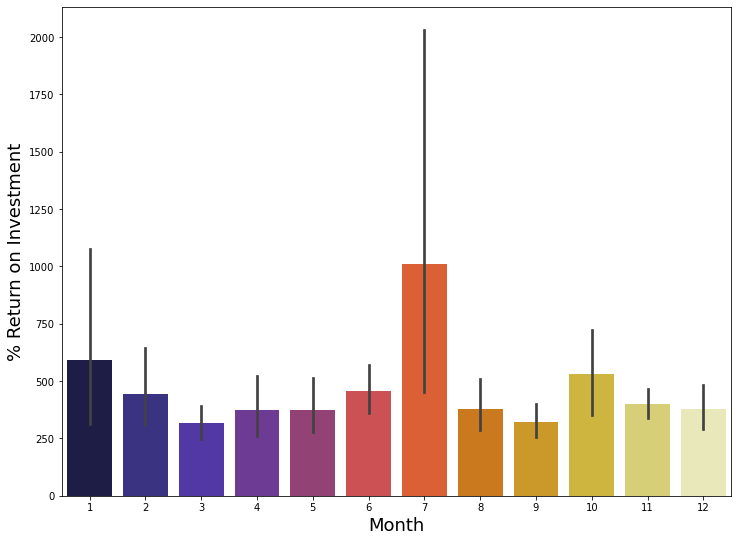

In [44]:
plt.figure(figsize=(12,9))
sns.barplot(x = 'month', y = 'ROI', data = movie_details_df, palette = 'CMRmap')
plt.xlabel('Month', fontsize=18)
plt.ylabel('% Return on Investment', fontsize=18)

#### Here we are viewing the relationship between the month the movie is released to theatres and the percent return on investment.  We can see a clear relationship of when the best times of the year to release a movie would be.  The really hot, and really cold portions of the calendar year, when people tend to want to be inside a bit more and are more inclined to partake in indoor activities such as watching movies.

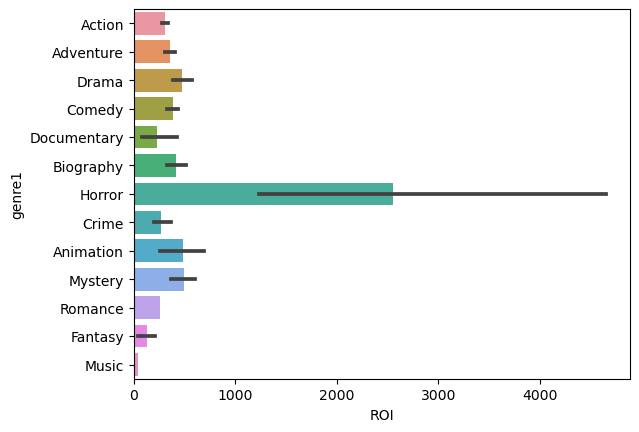

In [90]:
sns.barplot(x = 'ROI', y = 'genre1', data = movie_details_df)

In [ ]:
movie_details_df.drop(columns)

In [ ]:
movie_details_df['genre1']=movie_details_df['genre1'].astype('category').cat.codes

In [ ]:
movie_details_df['genre2']=movie_details_df['genre2'].astype('category').cat.codes

In [89]:
movie_details_df.corr()

,id,production_budget,year_x,month,domestic_gross,foreign_gross,year_y,start_year,runtime_minutes,world_gross,ROI
id,1.000000,-0.086351,0.045892,-0.008642,-0.043736,-0.058018,0.051495,0.045892,-0.009803,-0.052318,0.037591
production_budget,-0.086351,1.000000,0.048393,-0.042780,0.692971,0.772387,0.047922,0.048393,0.340003,0.761789,-0.087079
year_x,0.045892,0.048393,1.000000,-0.007504,0.099475,0.119742,0.985333,1.000000,0.114370,0.118260,0.038749
month,-0.008642,-0.042780,-0.007504,1.000000,-0.028299,0.017016,-0.010480,-0.007504,0.151367,0.006844,-0.010111
domestic_gross,-0.043736,0.692971,0.099475,-0.028299,1.000000,0.846293,0.103848,0.099475,0.277355,0.933351,0.057134
foreign_gross,-0.058018,0.772387,0.119742,0.017016,0.846293,1.000000,0.119799,0.119742,0.295783,0.981115,0.037789
year_y,0.051495,0.047922,0.985333,-0.010480,0.103848,0.119799,1.000000,0.985333,0.110589,0.118961,0.040166
start_year,0.045892,0.048393,1.000000,-0.007504,0.099475,0.119742,0.985333,1.000000,0.114370,0.118260,0.038749
runtime_minutes,-0.009803,0.340003,0.114370,0.151367,0.277355,0.295783,0.110589,0.114370,1.000000,0.300150,-0.086834
world_gross,-0.052318,0.761789,0.118260,0.006844,0.933351,0.981115,0.118961,0.118260,0.300150,1.000000,0.046208


In [ ]:
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(12, 9))    
palette = sns.color_palette("bright", 6)
g = sns.scatterplot(ax=ax, x="production_budget", y="ROI", data=movie_details_df)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0,100), ylim = (0,6000))
plt.xlabel('Production Budget (in Millions)', fontsize=18)
plt.ylabel('% Return on Investment', fontsize=18)

In [ ]:
movie_details_df.loc[movie_details_df['ROI'].idxmax()]

In [ ]:
movie_details_df.loc[movie_details_df['production_budget'].idxmax()]